<a href="https://colab.research.google.com/github/SantiagoMorenoV/Black_Scholes_Apple_Stock_Option_Price/blob/main/Black_Scholes_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apple Stock Option Price Valuation with Black-Scholes** 

This script implements the Black-Scholes equation to determine an option's strike price. For this purpose, I will use the Apple Stock time series from 2022-05-03 to 2023-05-03, then calculate its daily returns as a logarithmic difference.

Financial asset prices are acknowledged for not being iid processes, so they typically exhibit trends and seasonality. This is why logarithmic differences are preferred over simple ones when dealing with these types of time series.

Before printing the option price, the user must input the strike price, the time to expiration, and the risk-free rate.

# **Importing the libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# **Importing the dataset**

In [62]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SantiagoMorenoV/Black_Scholes_Option/main/AAPL.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-03,158.149994,160.710007,156.320007,159.479996,158.519745,88966500
1,2022-05-04,159.669998,166.479996,159.259995,166.020004,165.020355,108256500
2,2022-05-05,163.850006,164.080002,154.949997,156.770004,155.826065,130525300
3,2022-05-06,156.009995,159.440002,154.179993,157.279999,156.562683,116124600
4,2022-05-09,154.929993,155.830002,151.490005,152.059998,151.366486,131577900


# **Descriptive Statistics**

In [63]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe().round(2))


              Descriptive Statistics              
         Open    High     Low   Close  Adj Close        Volume
count  252.00  252.00  252.00  252.00     252.00  2.520000e+02
mean   149.50  151.51  147.73  149.73     149.38  7.832861e+07
std     10.91   10.74   11.11   10.99      11.01  2.463115e+07
min    126.01  127.77  124.17  125.02     124.83  3.519590e+07
25%    142.12  143.99  139.97  142.47     141.98  6.226732e+07
50%    148.88  150.93  147.26  149.38     148.93  7.366865e+07
75%    156.72  158.44  154.31  156.98     156.44  8.797182e+07
max    173.75  176.15  173.12  174.55     174.00  1.826020e+08


#**Calculating daily returns**

In [64]:
dataset['Daily Return'] = np.log(dataset['Adj Close']) - np.log(dataset['Adj Close'].shift(1))
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2022-05-03,158.149994,160.710007,156.320007,159.479996,158.519745,88966500,NaN
1,2022-05-04,159.669998,166.479996,159.259995,166.020004,165.020355,108256500,0.040190
2,2022-05-05,163.850006,164.080002,154.949997,156.770004,155.826065,130525300,-0.057328
3,2022-05-06,156.009995,159.440002,154.179993,157.279999,156.562683,116124600,0.004716
4,2022-05-09,154.929993,155.830002,151.490005,152.059998,151.366486,131577900,-0.033753
...,...,...,...,...,...,...,...,...
247,2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300,0.028000
248,2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200,0.007513
249,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,-0.000531
250,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,-0.006211


# **Calculating the stock volatility**

In [65]:
volatility = dataset['Daily Return'].std()
volatility.round(4)

0.0213

#**P & L Distribution**

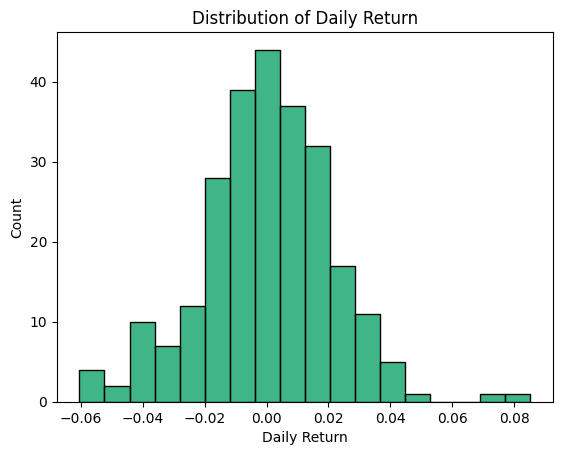

In [66]:
#Selecting our variable
variables = ["Daily Return"]

#Creating histograms
for var in variables:
  sns.histplot(data= dataset, x = var, color="#009E60")
  plt.title("Distribution of {}".format(var))
  plt.show

Alternatively, you can try this other code that does the same, but I prefer the one I used above. You can change its size in `figsize` and how many `bins` you want to use for your histogram.

```
plt.figure(figsize=(8,6))
dataset['Daily Return'].hist(bins=20)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()``



#**Stock returns boxplot**

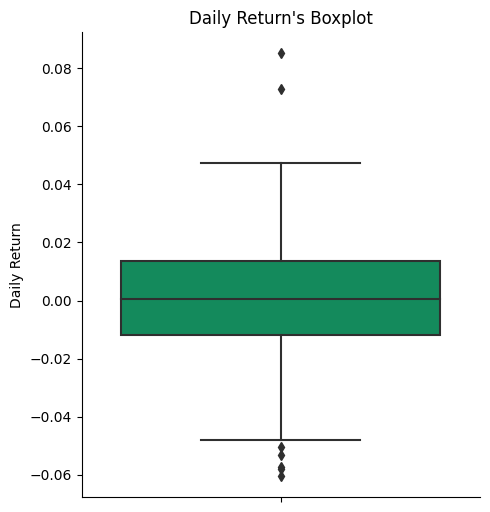

In [67]:
#Creating Boxplots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "box", color = "#009E60")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

#**Stock returns violin plot**

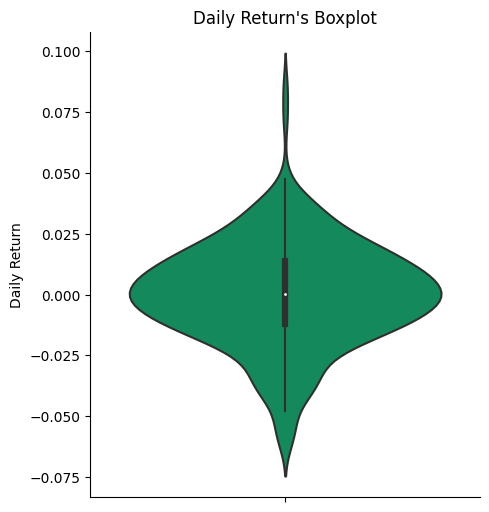

In [68]:
#Creating Viollin plots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "violin", color = "#009E60")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

# **Daily returns descriptive statistics**

In [69]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Daily Returns Descriptive Statistics"))
print(dataset['Daily Return'].describe().round(6))


       Daily Returns Descriptive Statistics       
count    251.000000
mean       0.000218
std        0.021264
min       -0.060472
25%       -0.011862
50%        0.000444
75%        0.013700
max        0.085236
Name: Daily Return, dtype: float64


# **Testing for outliers (Grubb's test)**

In [70]:
#Installing the outliers library
#!pip install outlier_utils
from outliers import smirnov_grubbs as grubbs
grubbs.test(dataset['Daily Return'], alpha=.05)


0           NaN
1      0.040190
2     -0.057328
3      0.004716
4     -0.033753
         ...   
247    0.028000
248    0.007513
249   -0.000531
250   -0.006211
251   -0.006488
Name: Daily Return, Length: 251, dtype: float64

In [71]:
grubbs.max_test_indices(dataset['Daily Return'], alpha=.05)

[133, 124]

Considering a significance level of 5%, Grubb's two-sided test identified the 124th and 134th Apple Stocks' daily returns as outliers. These outliers corresponded to 2022-11-10 and 2022-10-28.

In [72]:
outlier_indices = grubbs.max_test_indices(dataset['Daily Return'], alpha=.05)
for index in outlier_indices:
    print('Date:', dataset.loc[index, 'Date'], '- Daily Return:', round(dataset.loc[index, 'Daily Return'], 6))

Date: 2022-11-10 - Daily Return: 0.085236
Date: 2022-10-28 - Daily Return: 0.072835


#**Stock closing price series**

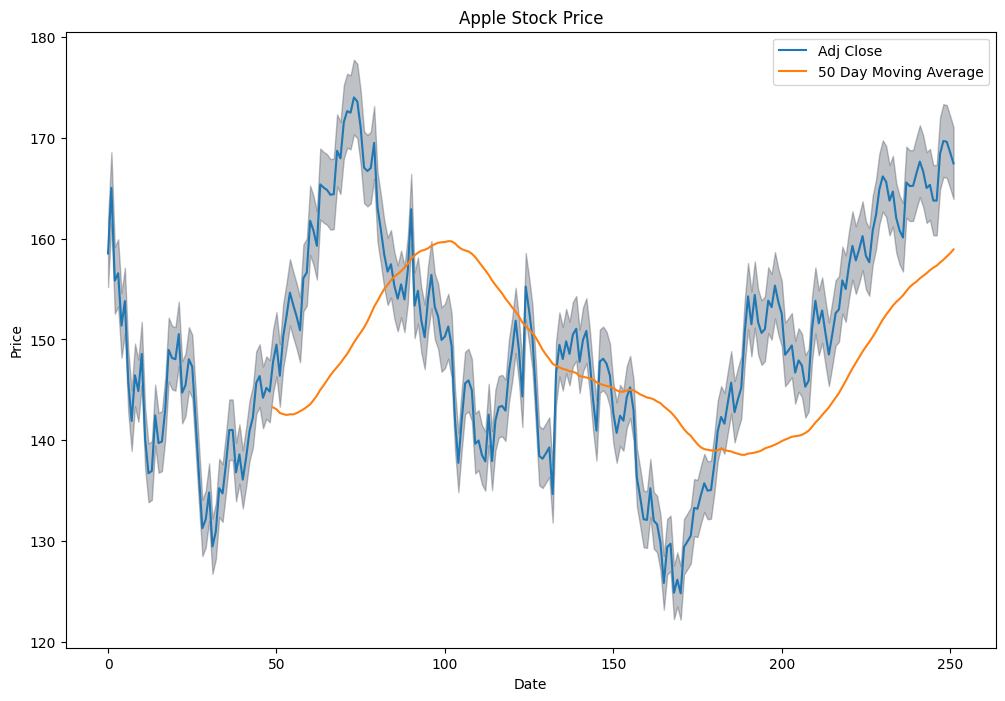

In [73]:
plt.figure(figsize =(12,8))
dataset['Adj Close'].plot()
dataset['Adj Close'].rolling(window=50).mean().plot(label='50 Day Moving Average')
plt.fill_between(dataset.index, dataset['Adj Close'] * np.exp(-volatility), dataset['Adj Close'] 
                 * np.exp(volatility), color='#293241', alpha=0.3)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# **Returns time series**

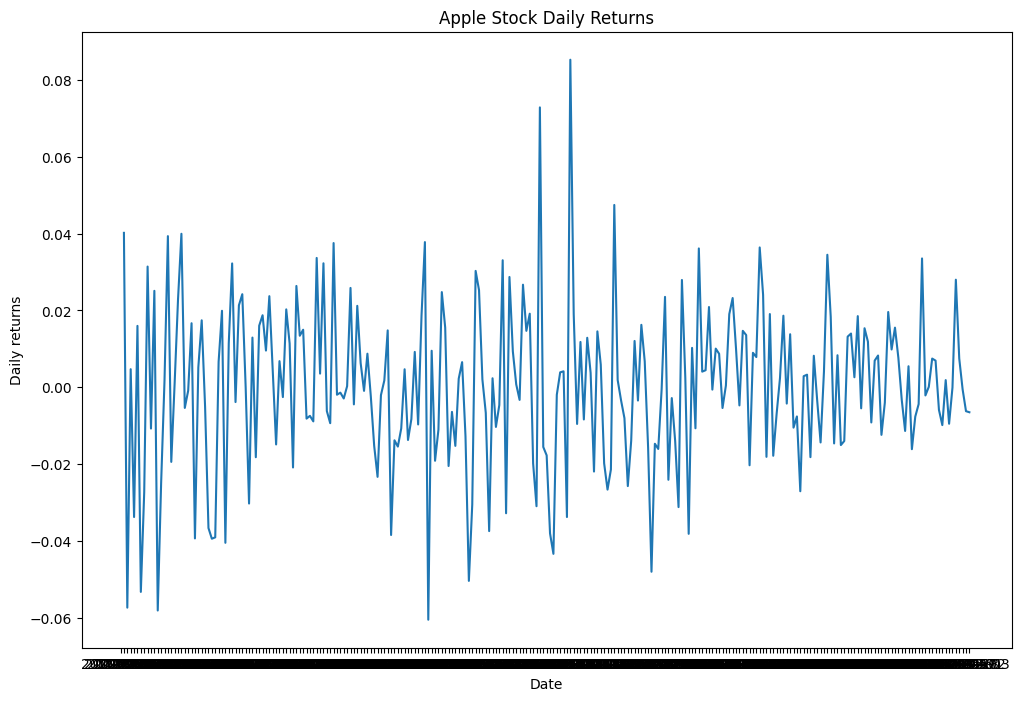

In [74]:
plt.figure(figsize =(12,8))
plt.plot(dataset['Date'], dataset['Daily Return'])
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.title('Apple Stock Daily Returns')
plt.show()

# **Imputing the strike price, time to expiration in years, and risk-free rate**

In [84]:
K = float(input('Enter the strike price: '))
T = float(input('Enter the time to expiration (in years): '))
r = float(input('Enter the risk-free interest rate: '))

Enter the strike price: 160
Enter the time to expiration (in years): 0.083333
Enter the risk-free interest rate: 0.0338


For this example, I am assuming a strike price of $ 160 per share provided the growing trend, that the option's expiration is 30 days, and that the USA's risk-free rate of the 10-Y T-Bonds (May 03, 2023) is 3.38% (you can use the current one according to your own needs).

You can check risk-rates in various sources like [Ycharts](https://ycharts.com/indicators/10_year_treasury_rate), Bloomberg, or Yahoo Finance.

Calculating the call option value

In [85]:
S = dataset['Adj Close'].iloc[-1]
d1 = (np.log(S / K) + (r + volatility ** 2 / 2) * T) / (volatility * np.sqrt(T))
d2 = d1 - volatility * np.sqrt(T)
call_value = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print(f'The value of the call option is {call_value:.2f}')

The value of the call option is 7.90


# **Results**

With the Apple stock's upward trend and evaluating the strike price, time to expiration, and the risk-free rate, the option to buy a share within the month would be $ 7.90 per share.

**Libraries used for outliers checking**

[**outlier-utils**](https://github.com/c-bata/outlier-utils/tree/master) by Masashi Shibata